# [Riddler Classic 2020-08-07](https://fivethirtyeight.com/features/can-you-reach-the-beach/)

In [19]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

In [8]:
def b(m):
    return binom.pmf(range(m + 1), m, 0.5)

In [9]:
b(10)

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

In [20]:
memo = {}
def g(x, n):
    if n == 0:
        return x
    if (x, n) in memo:
        return memo[(x, n)]
    m = math.floor(x / 2)
    result = np.dot(b(m), np.vectorize(lambda y: g(y, n - 1))(np.arange(m + 1) + x))
    memo[(x, n)] = result
    return result

In [24]:
g(2, 2)

3.0

In [120]:
expectations = np.vectorize(lambda n: g(2, n))(np.arange(1, 25))
powers = (1.25)**(np.arange(1, 25)) * 1.5

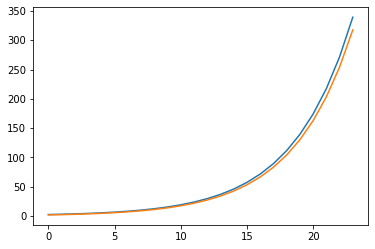

In [121]:
plt.plot(expectations)
plt.plot(powers)
plt.show()

In [122]:
expectations

array([  2.5       ,   3.        ,   3.625     ,   4.40625   ,
         5.3828125 ,   6.60351562,   8.12939453,  10.03674316,
        12.42092896,  15.40116119,  19.12645149,  23.78306437,
        29.60383046,  36.87978807,  45.97473509,  57.34341886,
        71.55427358,  89.31784197, 111.52230246, 139.27787808,
       173.9723476 , 217.3404345 , 271.55054312, 339.3131789 ])

In [123]:
powers

array([  1.875     ,   2.34375   ,   2.9296875 ,   3.66210938,
         4.57763672,   5.7220459 ,   7.15255737,   8.94069672,
        11.1758709 ,  13.96983862,  17.46229827,  21.82787284,
        27.28484105,  34.10605132,  42.63256415,  53.29070518,
        66.61338148,  83.26672685, 104.08340856, 130.1042607 ,
       162.63032587, 203.28790734, 254.10988418, 317.63735522])

In [124]:
expectations[1:] / expectations[:-1]

array([1.2       , 1.20833333, 1.21551724, 1.22163121, 1.22677794,
       1.23107069, 1.2346237 , 1.23754576, 1.23993634, 1.24188373,
       1.24346455, 1.24474416, 1.24577757, 1.24661061, 1.24728112,
       1.24782015, 1.24825307, 1.2486005 , 1.24887915, 1.24910251,
       1.2492815 , 1.24942487, 1.24953968])

In [125]:
powers / expectations

array([0.75      , 0.78125   , 0.80818966, 0.83111702, 0.85041727,
       0.86651508, 0.87983888, 0.8907966 , 0.89976128, 0.90706398,
       0.91299206, 0.9177906 , 0.9216659 , 0.92478979, 0.92730418,
       0.92932557, 0.93094903, 0.93225189, 0.9332968 , 0.93413443,
       0.93480561, 0.93534325, 0.9357738 , 0.93611853])

In [107]:
g(2, 26)

KeyboardInterrupt: 

In [126]:
g(4, 10)

34.0276126861573

In [127]:
g(5, 10)

41.478193283081154

In [128]:
g(10, 10)

89.90696716308511

In [133]:
g(15, 20)

1249.50090270337

In [142]:
np.vectorize(lambda x: g(x, 10))(np.arange(2, 20)) / np.vectorize(lambda x: g(x, 10))(np.arange(1, 19))

array([15.40116119,  1.48376746,  1.48905991,  1.2189569 ,  1.26943967,
        1.14150058,  1.18594022,  1.10452479,  1.1419499 ,  1.08286989,
        1.11479203,  1.0686478 ,  1.09635701,  1.05859223,  1.0830238 ,
        1.05110617,  1.07293198,  1.04531631])